In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
from datetime import date,datetime

In [4]:
transdf = pd.read_excel('Raw_data.xlsx')

In [5]:
transdf.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
transdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [7]:
# the column product_first_sold date is in float dtype we will have to change it into datetime dtype

In [8]:
#Total Records

In [14]:
print("Total Records (rows) in the dataset: {}".format(transdf.shape[0]))
print("Total Records (columns) in the dataset: {}".format(transdf.shape[1]))

Total Records (rows) in the dataset: 20000
Total Records (columns) in the dataset: 13


In [15]:
#Numeric Columns and Non Numeric Columns


In [19]:
df_numeric = transdf.select_dtypes(include=[np.number])
numeric_col = df_numeric.columns.values
print("numeric columns are:")
print(numeric_col)

df_non_numeric = transdf.select_dtypes(exclude=[np.number])
non_numeric_col = df_non_numeric.columns.values
print("non numeric columns are:")
print(non_numeric_col)


numeric columns are:
['transaction_id' 'product_id' 'customer_id' 'online_order' 'list_price'
 'standard_cost' 'product_first_sold_date']
non numeric columns are:
['transaction_date' 'order_status' 'brand' 'product_line' 'product_class'
 'product_size']


In [20]:
#1. Missing Values Check

In [22]:
transdf.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [23]:
# percentage of missing values

In [25]:
transdf.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [27]:
#1.1 Online Order

In [29]:
transdf[transdf['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


In [33]:
most_freq_online_order = transdf['online_order'].mode()
most_freq_online_order

0    1.0
Name: online_order, dtype: float64

In [34]:
transdf['online_order'].fillna(1, inplace=True)

In [36]:
transdf['online_order'].isnull().sum()

0

In [ ]:
# 1.2 It is seen that if brand is null Allt the columns such as productline,productclass,productsize,standardcost,product_firstsold date
#are all null and this comprises of 1% of data thus we can drop these values

In [38]:
transdf[transdf['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']]

,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
136,NaN,NaN,NaN,NaN,NaN,NaN
159,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN
406,NaN,NaN,NaN,NaN,NaN,NaN
676,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
19340,NaN,NaN,NaN,NaN,NaN,NaN
19383,NaN,NaN,NaN,NaN,NaN,NaN
19793,NaN,NaN,NaN,NaN,NaN,NaN
19859,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
transdf[transdf['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].shape[0]

197

In [41]:
records_to_drop = transdf[transdf['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].index
records_to_drop

Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [42]:
transdf.drop(index=records_to_drop, axis=0, inplace=True)

In [43]:
transdf.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [44]:
print("Total Records after Missing Values : {}".format(transdf.shape[0]))

Total Records after Missing Values : 19803


In [45]:
#2. Creating a New Feature Profit

In [46]:
transdf['profit']=transdf['list_price']-transdf['standard_cost']

In [51]:
import matplotlib.pyplot as plt2

C:\Users\mrpar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrpar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

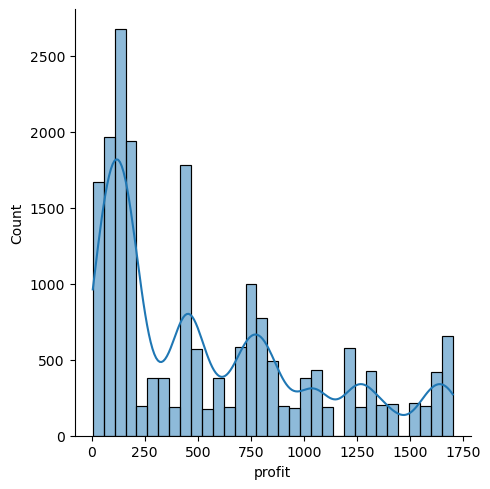

In [55]:
plt2.figure(figsize=(20,8))
sns.displot(transdf['profit'], kde=True)

In [56]:
#Inconsistency Check in Data
#We will check whether there is inconsistent data / typo error data is present in the categorical columns.
#The columns to be checked are 'online_order', 'order_status' ,'product_line', 'product_class' , 'product_class' and 'brand'

In [57]:
#3.1 Online Order

In [58]:
transdf['online_order'].value_counts()

online_order
1.0    10097
0.0     9706
Name: count, dtype: int64

In [59]:
#3.2 Order Status

In [60]:
transdf['order_status'].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

In [61]:
#3.3 Product Line

In [62]:
transdf['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [63]:
#3.4 Product class

In [64]:
transdf['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

In [65]:
#3.5 Product Size

In [66]:
transdf['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

In [67]:
#3.6 Brand

In [68]:
transdf['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

In [71]:
#Duplication Checks
#We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.
#For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.

In [74]:
transdf_dedupped = transdf.drop('transaction_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(transdf_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(transdf.shape[0]))

Number of records after removing customer_id (pk), duplicates : 19803
Number of records in original dataset : 19803


In [75]:
#5. Exporting the Cleaned Transactions Data Set to csv
#Currently the Transactions dataset is clean. 
#Hence we can export the data to a csv to continue our data analysis of Customer Segments by joining it to other tables.

In [76]:
transdf.to_csv('Transactions_Cleaned.csv', index=False)